In [1]:
from typing_extensions import TypedDict

class State(TypedDict):
    graph_state: str

In [2]:
def first_node(state):
    print("My first node is called")
    return {"graph_state": state["graph_state"]+"I am playing"}

def second_node(state):
    print("My second Node is called")
    return {"graph_state": state["graph_state"]+" Cricket"}

def third_node(state):
    print("My Third Node is called")
    return {"graph_state":state["graph_state"]+" Badminton"}

In [3]:
import random
from typing import Literal

def decide_play(state)->Literal["second_node","third_node"]:
    graph_state = state["graph_state"]

    if random.random()<0.5:
        return "second_node"

    return "third_node"

### Graph

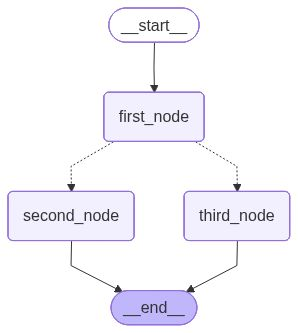

In [4]:
from IPython.display import Image,display
from langgraph.graph import StateGraph, START, END 

# Build Graph

builder = StateGraph(State)

builder.add_node("first_node",first_node)
builder.add_node("second_node",second_node)
builder.add_node("third_node",third_node)

# Logic

builder.add_edge(START, "first_node")
builder.add_conditional_edges("first_node",decide_play)
builder.add_edge("second_node",END)
builder.add_edge("third_node",END)

## ADD
graph = builder.compile()

# View
display(Image(graph.get_graph().draw_mermaid_png()))


In [5]:
graph.invoke({"graph_state":"Hii, My name is sai"})

My first node is called
My second Node is called


{'graph_state': 'Hii, My name is saiI am playing Cricket'}

### Basic Chatbot

In [6]:
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph,START,END
from langgraph.graph.message import add_messages


In [7]:
class State(TypedDict):
    messages : Annotated[list,add_messages]
    

In [8]:
graph_builder = StateGraph(State)

In [9]:
import os
from dotenv import load_dotenv

load_dotenv()


os.environ["GROQ_API_KEY"] = os.getenv("GROQ_API_KEY")

In [10]:
from langchain_groq import ChatGroq

llm = ChatGroq(model="llama-3.1-8b-instant")
llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x000001431CEB1290>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x000001431CF45D90>, model_name='llama-3.1-8b-instant', groq_api_key=SecretStr('**********'))

In [11]:
def chatbot(state:State):
    return {"messages":[llm.invoke(state["messages"])]}

In [12]:
graph_builder.add_node("chatbot",chatbot)

graph_builder.add_edge(START,"chatbot")
graph_builder.add_edge("chatbot",END)

graph = graph_builder.compile()



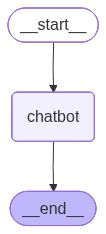

In [13]:
display(Image(graph.get_graph().draw_mermaid_png()))

In [14]:
def stream_graph_updates(user_input: str):
    for event in graph.stream({"messages":[{"role":"user","content":user_input}]}):
        for value in event.values():
            print("Assistant:",value["messages"][-1].content)

In [15]:
while True:
    user_input = input("User: ")
    if user_input.lower() in ["quit","exit",'q']:
        print("Goodbye!")
        break
    stream_graph_updates(user_input)

Assistant: Hello. What's on your mind? Do you have any questions or topics you'd like to discuss? I'm here to help.
Assistant: I am unable to verify who Gorantla Sai Krishna is.
Assistant: Tredence Analytics is a global analytics consulting firm that specializes in artificial intelligence, machine learning, and data science. Here are some key points about the company:

1. **Background**: Tredence Analytics was founded in 2012 and is headquartered in Pune, India. The company has offices in the United States, Europe, and Asia.

2. **Services**: Tredence Analytics provides a range of services, including data science consulting, AI and machine learning implementation, predictive analytics, and data engineering. The company works with clients across various industries, such as consumer goods, retail, healthcare, and manufacturing.

3. **Key Practice Areas**: Tredence Analytics has several key practice areas, including:
	* AI and Machine Learning (ML): The company helps clients implement AI 